# Praktikum 1: Data Preprocessing - California Housing Datasets. 

Um sicherzustellen, dass alle notwendigen Python-Dependencies zur Verfügung stehen, arbeiten wir in diesem Praktikum in einem Docker Container. 

**Vorgehen:**
- Laden Sie das Jupyter Notebook von Moodle in einen ML1-Praktikums-Ordner in Ihrem User-Ordner. 
- Geben Sie im Terminal ein: "docker_start_ml1_gpu". Dadurch wird ein Skript aufgerufen, das einen Docker-Container für Sie baut. Das Terminal bleibt offen, wechselt nun allerdings in einen Terminal des Docker-Containers.
- Öffnen Sie den angegebenen localhost:8888-Link mit Token im Browser. Ein Jupyter Notebook sollte sich öffnen. Unter dem Ordner "host" finden Sie Ihr Homedirectory und auch das Jupyter-Notebook für das Praktikum. 
- Zum Ende des Praktikums speichern Sie Ihre Fortschritte, und beenden dann den Docker Container mit der Eingabe von "exit" im Terminal. 


**Regeln für das Praktikum:**
- Sie können die Aufgaben alleine oder zu zweit bearbeiten.
- Sie dürfen in Vorlesungs-Skripten nachlesen
- Sollten Fragen auftauchen, oder die Verwendung von Klassen unklar sein, schlagen Sie  die Dokumentation online nach
- Befolgen Sie einfach den Anweisungen im Skript; manchmal wird im Markdown Text eine Frage gestellt; tragen Sie Ihre Antwort in der nächsten Markdown-Zelle bei #TODO ein!

**Hinweis:**
Wir verwenden zum Aufbereiten des Datensets die [pandas API](https://pandas.pydata.org/docs/reference/)
Zum Visualisieren von Daten können Sie Matplotlib oder Seaborne verwenden, die Sie bereits aus Data Science kennen, oder pandas-Funktionen.
Zum Trainieren von Modellen verwenden wir in dieser Vorlesung die [Scikit Learn API](https://scikit-learn.org/stable/)


Wir haben in der Vorlesung das **California Housing Dataset** besprochen: Es enthält die mittleren Preise für Häuser in Bezirken von Californien zusammen mit den geografischen Daten wie Längen- und Breitengrad und Nähe zum Meer, Zensus-Daten wie den Einwohnerzahlen in jedem Bezirk, der Gesamtanzahl von Räumen und Haushalten, sowie dem mittleren Einkommen in den Bezirken. 

**Ziel: Wir wollen mit Hilfe dieser Daten herausfinden, wie man den mittleren Hauspreis von den anderen gegebenen Daten ableiten kann.**

### 1. Schritt: Datenvisualisierungen

Der erste Schritt wenn man mit Daten arbeitet ist, diese so gut wie möglich kennen zu lernen und zu visualisieren. 

Führen Sie die vorbefüllten Zellen aus, welche die Daten von "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz" in einen Unterordner "housing" von "datasets" im ML1-Prakikumsordner speichern, in dem sich auch dieses Notebook befindet. Dann werden die Daten geladen. 

In [1]:
# Import der notwendigen Dependencies
import os
# zum Entpacken von Dateien:
import tarfile
# zum Herunterladen von Dateien:
import urllib.request
# zum Bearbeiten von "DataFrames"
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")

# Funktion zum Herunterladen der Daten
"""Optional Arguments: housing_url=HOUSING_URL, housing_path=HOUSING_PATH"""

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

/var/folders/wk/lvhvm_2j0qz86pj3f3dl9t9w0000gn/T/ipykernel_4464/2033938807.py:25: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [3]:
# Funktion zum Lade der Daten
"""Optional Argument: housing_path=HOUSING_PATH"""

def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

Holen Sie sich Informationen über den Datensatz "housing", indem Sie die Anweisungen der Kommentare unten befolgen: 

In [4]:
# Sehen Sie sich die ersten Zeilen der Tabelle mit .head() an.
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Was ist ein Instance des Datensatzes?

Ein Bezirk in Californien

In [5]:
# Holen Sie sich die grundlegenden Infos über die Daten mit .info()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Was sind die Features und das Label der Daten? Notieren Sie diese: 

**A:**
Features: longitude, latitude, housing median age, total rooms, total bedrooms, population, housholds, median income, median house value, ocean proximity

Label: median house price

Welche Features sind nicht numerisch? Sind diese ordinal oder nominal?

ocean proximity ist nicht numerisch, es ist ordinal da es die nähe zum meer angibt in "NEAR BY", "INLAND" etc.

In [6]:
# Lassen Sie sich die wichtigsten statistischen Daten zu den einzelnen Features ausgeben
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Werfen Sie einen Blick auf den Mittelwert von total_rooms und total_bedrooms. Kann es sich hierbei um die Anzahl von Räumen je Haus handeln? Was beschreiben die Werte wohl? 

**A**: Total rooms beschreibt die gesamten Räume in den Häusern in einem Bezirk und total bedroom gibt die gesamten Schalfzimmer in den häusern des bezirks an, der wert total bedrooms ist also in total rooms enthalten


Nun geht es an die Visualisierungen in Form von Histogrammen, also die Unterteilung der Daten in diskrete Klassen und Anzeige der Häufigkeit jeder Klasse. Lassen Sie Sich Histogramme aller Features ausgeben.

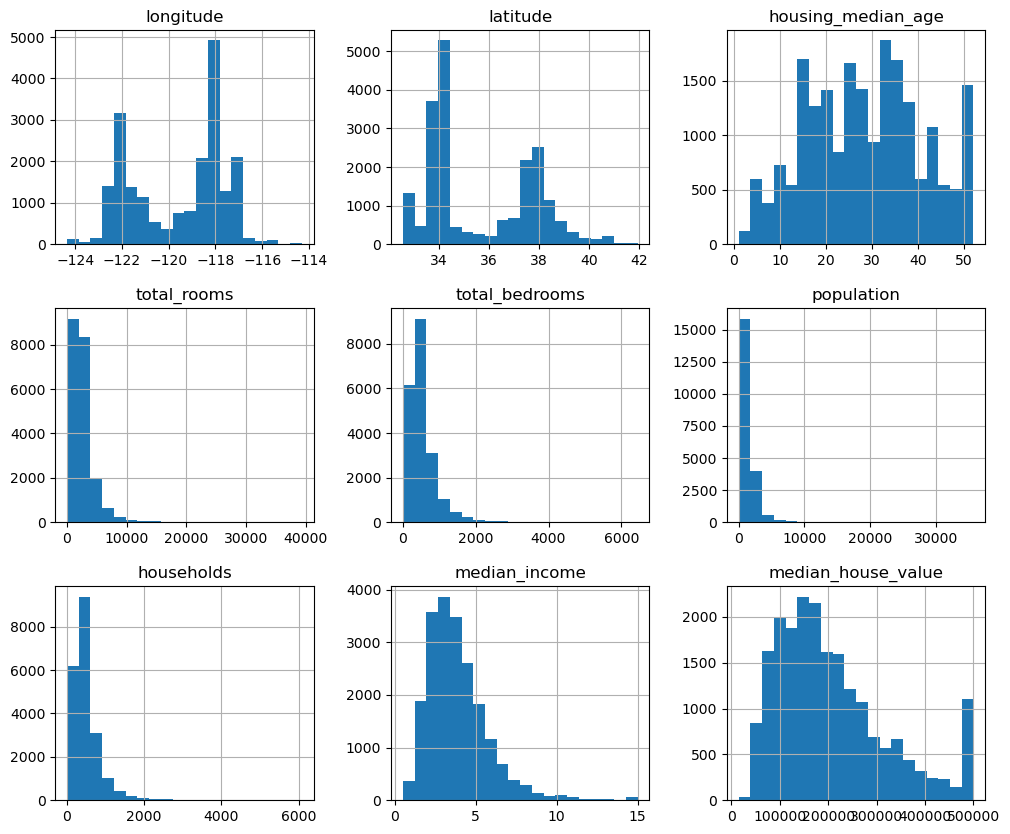

In [21]:
# Anzeige von Histogrammen der Features
housing.hist(figsize=(12,10), bins=20)
plt.show()

Lesen Sie von den Histograms ab, wo (longitude und latitude) die meisten districts sind. Googlen Sie, wo sich dieser Ort befindet.

Antwort: Los Angeles, Kalifornien

Als nächstes werten wir **Pearson's Korrelationsmatrix** aus. 
Berechnen Sie die Korrelationsmatrix in der ersten Zelle und lassen Sie sie ausgeben.

In [33]:
# Berechnen der Korrelationsmatrix
housing_numeric = housing.drop('ocean_proximity', axis=1)
housing_corr = housing_numeric.corr('pearson')
housing_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Visualisieren Sie die Absolutbeträge der Korrelationsmatrix mit .matshow() in der nächsten Zelle.

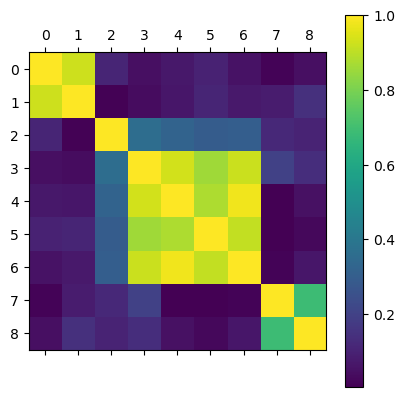

In [34]:
# Visualisierung der Korrelationsmatrix
# Berechnen der Korrelationsmatrix
corr_matrix = housing_numeric.corr().abs()

# Visualisierung der Korrelationsmatrix
plt.matshow(corr_matrix)
plt.colorbar()
plt.show()

Welche Spalte der Korrelationsmatrix ist die wichtige für unser Ziel, median_house_value zu prognostizieren? 

Spalte 4 total rooms, da dort die Korrelation am höchsten  ist.

Lassen Sie sich diese separat mit absteigenden Werten ausgeben in der nächsten Zelle.

In [35]:
# Sortieren der Spalte 'total_rooms' in absteigender Reihenfolge und Ausgabe
housing_corr['total_rooms'].sort_values(ascending=False)


total_rooms           1.000000
total_bedrooms        0.930380
households            0.918484
population            0.857126
median_income         0.198050
median_house_value    0.134153
longitude             0.044568
latitude             -0.036100
housing_median_age   -0.361262
Name: total_rooms, dtype: float64

Welches Feature ist dasjenige, das am meisten mit median_house_value korreliert ist? 

Was ist das am wenigsten korrelierte Feature? Was bedeutet dies? Und was bedeutet es nicht?

#TODO

Visualisieren Sie die Abhängigkeit von median_house_value und diesem wichtigsten Feature in einem Scatterplot in der nächsten Zelle.

Was fällt auf und wie erklären Sie sich das? #TODO

### 2. Schritt: Adding additional features

Nachdem wir ein gutes Gefühl dafür haben, wie die Daten aussehen und welche Features relevant sind, nutzen wir dieses Wissen, um potentiell wichtige zusätzliche Features aus den bisher vorhandenen abzuleiten.  

Das Datenset beinhaltet zum Beispiel die Features: 
- total_rooms: die Gesamtzahl von Räumen im District
- total_bedrooms: die Gesamtzahl von Schlafzimmern im District
- Population: die Anzahl von Einwohnern im District
- Households: die Ahzahl von Haushalten im District

Gestalten Sie aus diesen Features sinnvolle(re) neue Features, welche einen Einfluss auf den mittleren Preis eines Hauses haben könnten:

Berechnen Sie in der nächsten Zelle erneut die Korrelationmatrix und lassen sich die wichtigste Spalte nach Größe absteigend sortiert ausgeben. 

### 3. Schritt: Preparing the data for ML: Train-Test Split und Input-Label Split

Der dritte Schritt ist es, die Daten in Training Set und Test Set zu unterteilen. 

Hinweis: Dies müssen wir tun, BEVOR wir die Daten bereinigen. 

Grund: Wir wollen die Daten im Test set verwenden, um die Leistung des Algorithmus unvoreingenommen bewerten zu können (das heißt, dass der Algorithmus beim Trainieren keine Infos aus dem Test set gesehen haben darf). Aber beim Bereinigen der Daten werden oft Mittelwerte aus dem ganzen Datenset verwendet, um fehlende Daten zu ersetzen. Wenn dieser Mittelwert incl. der Testdaten berechnet wird, ist der Algorithmus schon voreingenommen bzgl. der Test Daten. Dies wäre ein Fall von **Data Leakage**.

Nachdem wir separate Trainings und Test Sets haben, unterteilen wir diese in Input-Daten und Labels, weil ML Algorithmen diese als separaten Input brauchen.

##### Train-Test-Split ohne Scikit-Learn

Um zu illustrieren, was bei diesem Split passiert, schreiben Sie eine Funktion "split_train_test", die "housing" in zwei DataFrames unterteilt. 
Argumente der Funktion: 
- ein DataFrame, der zu unterteilen ist
- eine Zahl zwischen 0 und 1 (oft: 0.2), die angibt, welcher Bruchteil der Daten in das Test Set soll. 
Output der Funktion: 
Zwei DataFrames: training set und test set

Hierbei ist wichtig, dass die housing daten vor dem Split zufällig durchpermutiert werden (verwenden Sie np.random.permutation auf die Zeilennummern), um irgendwelche "Sortierungen" in den Daten zu vermeiden.

Um die Ergebnisse des zufälligen Durchpermutierens reproduzierbar zu machen für jeden Durchlauf in diesem Praktikum, setzen Sie zuvor np.random.seed(42).

In [10]:
# Schreiben Sie Ihre Funktion split_train_test hier:


In [11]:
# Nutzen Sie die Funktion, um die Daten 80-20 in "train_set" und "test_set" aufzuteilen


# Lassen Sie sich die Länge der DataFrames ausgeben. Überprüfen Sie die Aufteilung 80-20



##### Train-Test Split mit Scikit-Learn

Nutzen Sie in der nächsten Zelle statt dessen die Scikit-Learn Methode [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), um die Daten in train_set und test_set aufzuteilen.

In [12]:
# Verwenden Sie Sklearn's train_test_split für den Split in train_set und test_set

# Lassen Sie sich die ersten Zeilen von test_set ausgeben. 


##### Stratified Splits

Obige Methoden unterteilen das Datenset zufällig in zwei Sets. Allerdings kann dies, wenn man Pech hat, zu einem sogenannten **Data mismatch** bzw. **nonrepresentative Training Data** führen. 

Was dies ist, lässt sich an einem einfachen Beispiel erklären: Angenommen, wir klassifizieren die MNIST-Bilder von handgeschriebenen Zahlen, und der Split unterteilt die Daten so, dass alle Bilder von Zahlen von 0-7 im Training Set und alle Bilder von 8 oder 9 im Test Set sind. Dann lernt der Algorithmus nur, die Zahlen 0-7 zu erkennen, und ist bei den Test-Bilder von 8 und 9 völlig aufgeschmissen! 

In unserem Beispiel könnte so etwas auch passiert sein: Angenommen, es sind zufällig alle Daten im Trainings-Set gelandet, die von "reichen" Districts kommen, mit hohem median_income - während alle ärmeren Districts im Test-Set landen. 
Dann wird das trainierte Modell ziemlich sicher falsche Prognosen generieren. 

Um zu sehen, ob dies bei unserem bisherigen train und test set der Fall ist, unterteilen wir das Feature median_income in fünf Einkommenskategorien und überprüfen, wie die Verteilung im train und test set ist im Vergleich zum gesamten Datenset. Führen Sie die vorbefüllten Zellen aus. 

In [13]:
# Hinzufügen einer neuen Feature-Spalte genannt "income_cat", 
# welche jede Instance (also jeden District) je nach Mittlerem Einkommen
# in eine von 5 Einkommensklassen einteilt

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

NameError: name 'np' is not defined

In [14]:
# Wie viel Prozent der Instances sind in welcher Einkommensklasse?



Um auf jeden Fall **Data Mismatch** zu vermeiden, kann man einen **stratifizierten Split = stratified train-test-split** ausführen. 
Hierbei wird ein kategorielles Feature ausgewählt, von dem wir sicher gehen wollten, dass die einzelnen Klassen bei dem Split gleich verteilt werden (also die gleiche Verteilung haben wie im ursprünglichen Datenset). Falls das Feature nicht kategoriell ist, kann man es wie oben in ein kategorielles Feature verwandeln. 

(Vor allem bei Klassifizierungs-Tasks wie dem MNIST Beispiel von oben ist es hilfreich, einen stratifizierten Split bzgl der labels zu machen.)

Im Folgenden lernen wir zwei Arten kennen, wie man einen stratified Split ausführen kann: 

Die einfachste: Scikit-Learn's train_test_split hat eine "stratify" Option. Hierzu verwenden Sie als Wert der stratify-Option die Spalte, bezüglich der stratifiziert werden soll. Modifizieren Sie den train_test_split Code von oben entsprechend in der nächsten Zelle und nennen Sie die entsprechenden Mengen "strat_train_set" und "strat_test_set". Alternativ können Sie auch [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) verwenden. 

In [15]:
# modifizierter train_test_split Code mit stratify


In [16]:
# Berechnen Sie die prozentuale Verteilung der 5 Einkommensklassen für train_set 


Nachdem wir income_cat für den stratifizierten Split verwendet haben, brauchen wir sie nicht mehr. Löschen Sie die Spalte wieder mit pandas' [drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) mit der Option "inplace=True". 

In [17]:
# Löschen Sie die Spalte in allen DataFrames


##### Input-Label Split

Wir trennen nun sowohl für strat_train_set, als auch für strat_test_set die Labels von den Input-Daten.

Löschen Sie hierzu mit .drop (dieses Mal mit Inplace=False) die label-Spalte "median_house_value" und nennen Sie den neuen DataFrame train.
Kopieren Sie außerdem die Spalte median_house_value in einen DataFrame namens train_labels.

Führen Sie dieselben Schritte durch für strat_test_set und nennen Sie die neuen DataFrames test und test_labels.

- Speichern Sie die train_labels als csv-Datei "train_labels.csv" unter dem Pfad HOUSING_PATH ab. 
- Speichern Sie die test_labels als csv-Datei "test_labels.csv" unter dem Pfad HOUSING_PATH ab!

ACHTUNG: Setzen Sie dabei immer index = False. Warum ist das wichtig, falls Sie später die Daten einlesen und zum Trainieren eines Modells verwenden wollen? 

#TODO

### 4. Schritt: Data Cleaning

Als nächstes bereinigen wir die Trainings Daten (und nur diese), das heißt wir kümmern uns um fehlende Werte. Es gibt zwei Möglichkeiten, mit fehlenden Daten umzugehen: wir lassen sie entweder weg, oder ersetzen sie durch geeignete Werte (z.B. Durchschnittswerte). Doch zunächst müssen wir erst mal herausfinden, welche Werte fehlen.

##### Finden von fehlenden Werten in den Daten

Finden Sie heraus, wie viele Werte in "train" in den einzelnen Features fehlen: 

Wir betrachten zunächst die Instances, die Null Values enthalten: 

In [ ]:
incomplete_rows = train[train.isnull().any(axis=1)]

##### Methoden, mit unvollständigen Daten umzugehen

1. **Komplettes Feature löschen**: Wenn in einer Spalte sehr viele Werte nicht befüllt sind, kann es das beste sein, einfach die Spalte zu löschen und die Instances, die hier keinen Eintrag haben, zu behalten. (gut, wenn man wenige Daten hat und ein Feature systematisch schlecht befüllt ist)
2. **Unvollständige Instances löschen**: Hiermit kann man alle Instances aus dem Datensatz löschen, in denen ein Datensatz fehlt. Über die Option subset kann man einschränken, in welcher Spalte hier nach fehlenden Werten gesucht wird. Diese Option ist besser, wenn es nur wenig Instances gibt, die schlecht sind, und nicht systematisch eine ganze Spalte schlecht ist.
3. **Nichts löschen, sondern fehlende Werte ersetzen** mit .fillna(): generell eine bevorzugte Variante, weil man keine Instances oder Features verliert. 


Wenden Sie 1. auf incomplete_rows an und sehen Sie sich das Ergebnis an. (mit dem default Inplace=False)

Wenden Sie 2. auf incomplete_rows an und sehen Sie sich das Ergebnis an. (mit dem default Inplace=False)

Wenden Sie 3. an und ersetzen die fehlenden Werte durch den Median mit fillna. 

##### Unvollständige Daten ersetzen mit Scikit Learn

Scikit Learn bietet eine bequeme Lösung, um den letzten Schritt (fehlende Werte durch irgendwelche passenden Werte ersetzen) automatisch für alle (numerischen) Spalten gleichzeitig auszuführen: [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

Legen Sie bitte zuerste eine Kopie "housing_num" des DataFrames ohne das nicht-numerische Feature "ocean_proximity" an, und wenden sie in der nächsten Zelle den SimpleImputer auf diese Kopie an mit .fit (berechnet die Zentralwerte) und .transform (ersetzt die fehlenden Daten mit den Zentralwerten). Das Ergebnis ist ein numpy ndarray. Verwandeln Sie es wieder in ein pandas Dataframe "train_num_imputed".  

### 5. Schritt: Verarzten von kategoriellen Features

Ein ML Algorithmus kann keine Strings verarbeiten, deswegen müssen kategorielle Features wie "ocean_proximity" entweder in (1,2,3,...) oder in One-Hot Vektoren ((1,0,0,...), (0,1,0,0,....), (0,0,1,0,...)... statt "<$1H OCEAN"/"INLAND"/NEAR OCEAN...")verwandelt werden. 
Dafür gibt es in sklearn den
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


Was ist hier geeigneter und warum?

#TODO


Wenden Sie dies in der nächsten Zelle auf den Dataframe mit den kategoriellen Spalten (also hier nur: ocean_proximity - aber als Dataframe, nicht als Series!) an. 

Wie verändert dies die Daten?

#TODO

Lassen Sie sich die Spaltenüberschriften ausgeben. 
Hinweis: benutzen Sie dafür das `.categories_` Attribut des oben benutzten Sklearn Estimators. 


### 6. Schritt: Feature Scaling

ML Algorithmen können in der Regel nicht gut mit unterschiedlich dimensionierten Features umgehen. Der Grund ist, dass größere Zahlen im direkten Vergleich mit sehr kleinen einfach mehr ins Gewicht fallen - das heißt, wenn ein wichtiges Feature sehr kleine Einträge hat, und ein unwichtiges s
ehr große, dann kann es sein dass der Algorithmus trotzdem dem unwichtigen Feature mehr Gewicht gibt. 

Nennen Sie zwei Möglichkeiten, die Features zu skalieren, und überlegen Sie sich, welche Vor- und Nachteile es geben könnte!

#TODO


Verwenden Sie in der nächsten Zelle den [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), um die numerischen Features train_num_imputed zu standardisieren. Er gibt ein ndarray zurück. Wandeln Sie es wieder in ein pandas DataFrame um und lassen Sie sich die ersten Zeilen ausgeben.

#### Verwenden einer Pipeline für das Data Processing 

Die obigen Schritte für die numerischen Spalten, also Data Cleaning und dann Standardisieren, kann man auch in einer Pipeline auf einmal machen. 

Wenden Sie dafür Scikit Learn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), um den SimpleImputer und den StandardScaler in einem Schritt auf die untransformierten numerischen Daten housing_num anzuwenden.

Wenn wir allerdings nicht nur die numerischen, sondern die numerischen und die kategoriellen Features gleichzeitig in einer Pipeline transformieren wollen, geht das mit der [ColumnTransformer] (https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). 

Verwenden Sie den ColumnTransformer, um die oben durchgeführten Transformationen (die numerische Pipeline für die numerischen Spalten, und OneHotEncoder für die kategorielle Spalte ocean_proximity) auf den ursprünglichen DataFrame training anzuwenden. 

Das Resultat des Transformers ist wieder ein ndarray. Verwandeln Sie es zu Übung wieder in einen DataFrame, aber Achtung: Wenn Sie das Ergebnis in einen DataFrame umwandeln, beachten Sie, dass die Spaltenüberschriften nun andere sind! Zusätzlich zu den numerischen Features gibt es nun für jede ocean_proximity-Kategorie eine Spalte!

Nennen Sie das resultierende DataFrame housing_train.

Wenden Sie den ColumnTransformer auch auf das Test Set an, und nennen Sie das resultierende DataFrame housing_test.

Speichern Sie die Trainings-Datensätze housing_train als csv-Datei "housing_train.csv" und housing_test als csv-Datei "housing_test.csv" unter dem Pfad HOUSING_PATH ab! Setzen Sie dabei index = False wie zuvor (aus den gleichen Gründen!)

Zählen Sie hier noch einmal auf wie Sie allgemein vorgehen würden für Schritte 4-6 bei einem Datensatz mit numerischen und kategoriellen Features

#TODO

## Trainieren eines LinearRegression Models und Evaluation

Trainieren Sie ein [Lineares Regressionsmodell](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) lin_reg. 

Dazu generieren Sie zuerst ein Objekt lin_reg der Klasse LinearRegression, und trainieren Sie dieses Objekt dann mit `lin_reg.fit(housing_train, train_labels)``. Dadurch werden die Parameter des Modells den Daten angepasst, so dass das Modell die `train_labels`` möglichst genau vorhersagt.

Lassen Sie sich dann den Score ausgeben. 

Lassen Sie sich die trainierten Parameter ausgeben. 

Geben Sie vier Performance Measures für Regression an, und beschreiben Sie in jeweils einem Satz, was diese messen.

#TODO

- Generieren Sie die Vorhersagen des Modells auf den Testdaten mit `predict()``. 
- Lassen Sie sich alle vier performance measures auf den Testdaten ausgeben.

Ist dieses Ergebnis gut? Wenn nein, was könnte der Grund sein?


#TODO

Beschreiben Sie im nächsten Markdown-Fenster: 
- wie Cross Validation funktioniert
- was der Vorteil von Cross-Validation ist

#TODO

Berechnen Sie die 10-fold Cross-Validation Scores des linearen Modells auf dem training set, wobei Sie als zugrunde liegende performance measure den negativen MSE verwenden. Geben Sie die Scores aus, zusammen mit ihrem Mittelwert und der Standardabweichung. (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)